# Earthkit Crash Course
This notebook will showcase the basic usecases of `earthkit` and hopefully provide enough information to help you get started and analyse the predictions you've made.

In [1]:
import earthkit as ek

Importing `earthkit` as `ek` helps simplify later calls, consider it as `import xarray as xr`

## Earthkit Components

`earthkit` contains a variety of packages, and you can see them all below, we will only be looking at a subset, mainly `data`, `plots`, and `regrid`.

| Component              | Description                                                                 | Logo |
|------------------------|-----------------------------------------------------------------------------|------|
| [earthkit-data](https://earthkit-data.readthedocs.io/en/latest/)        | Format-agnostic Python interface for geospatial data with a focus on meteorology and climate science. | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-data-light.svg" width="180px"> |
| [earthkit-geo](https://earthkit-geo.readthedocs.io/en/latest/)         | Geospatial computations.                                                    | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-geo-light.svg" width="180px"> |
| [earthkit-hydro](https://earthkit-hydro.readthedocs.io/en/latest/)       | Operations on river networks.                                               | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-hydro-light.svg" width="180px"> |
| [earthkit-meteo](https://earthkit-meteo.readthedocs.io/en/latest/)       | Meteorological computations.                                                | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-meteo-light.svg" width="180px"> |
| [earthkit-plots](https://earthkit-plots.readthedocs.io/en/latest/)       | Visualisation tools and templates.                                          | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-plots-light.svg" width="180px"> |
| [earthkit-regrid](https://earthkit-regrid.readthedocs.io/en/latest/)      | Regridding of geospatial data.                                              | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-regrid-light.svg" width="180px"> |
| [earthkit-time](https://earthkit-time.readthedocs.io/en/latest/)        | Manipulation of dates and time for weather forecasting.                     | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-time-light.svg" width="180px"> |
| [earthkit-transforms](https://earthkit-transforms.readthedocs.io/en/latest/)  | Aggregation and transformation of geospatial data.                          | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-transforms-light.svg" width="180px"> |
| [earthkit-workflows](https://earthkit-workflows.readthedocs.io/en/latest/)   | Scheduling and execution of task graphs.                                    | <img src="https://github.com/ecmwf/logos/raw/refs/heads/main/logos/earthkit/earthkit-workflows-light.svg" width="180px"> |

## Data - opening
The first step of any analysis is opening the data, with `earthkit` we use `earthkit-data`, and open from a source, checkout the documentation for the other sources if you are interested. 

For our use case we will just open from a file, this can be a `grib` or a `netcdf` file.

In [2]:
ds = ek.data.from_source('file', 'out.grib')
ds.head()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10u,surface,0,20250823,0,0,fc,0,reduced_gg
1,ecmf,10v,surface,0,20250823,0,0,fc,0,reduced_gg
2,ecmf,2d,surface,0,20250823,0,0,fc,0,reduced_gg
3,ecmf,2t,surface,0,20250823,0,0,fc,0,reduced_gg
4,ecmf,msl,surface,0,20250823,0,0,fc,0,reduced_gg


Operations can be done on this dataset similar to an `xarray` object, and in fact you can convert to xarray with `to_xarray()`.

### Common Operations
- `sel`   : Select based on metadata
- `isel`  : Select on indexes
- `ls`    : List the fields in the data
- `values`: Get the raw numpy arrays

In [3]:
ds.isel(step = slice(None, None, 4)).sel(param = '2t').ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,20250823,0,0,fc,0,reduced_gg
1,ecmf,2t,surface,0,20250823,0,24,fc,0,reduced_gg
2,ecmf,2t,surface,0,20250823,0,48,fc,0,reduced_gg
3,ecmf,2t,surface,0,20250823,0,72,fc,0,reduced_gg
4,ecmf,2t,surface,0,20250823,0,96,fc,0,reduced_gg
5,ecmf,2t,surface,0,20250823,0,120,fc,0,reduced_gg
6,ecmf,2t,surface,0,20250823,0,144,fc,0,reduced_gg
7,ecmf,2t,surface,0,20250823,0,168,fc,0,reduced_gg
8,ecmf,2t,surface,0,20250823,0,192,fc,0,reduced_gg
9,ecmf,2t,surface,0,20250823,0,216,fc,0,reduced_gg


In [4]:
ds.isel(step = slice(None, None, 4)).sel(param = '2t').values

array([[272.65270996, 272.61364746, 272.65270996, ..., 231.09020996,
        231.26403809, 231.49450684],
       [273.1227417 , 273.32095337, 273.27731323, ..., 228.68424988,
        228.50816345, 228.76544189],
       [272.4604187 , 272.53302002, 272.63031006, ..., 227.53796387,
        226.76737976, 227.27113342],
       ...,
       [271.4029541 , 271.44448853, 271.58108521, ..., 219.58776855,
        218.89793396, 219.40097046],
       [269.95016479, 270.05514526, 270.34881592, ..., 215.62391663,
        215.28649902, 215.94598389],
       [269.23648071, 269.37802124, 269.70162964, ..., 212.52796936,
        212.38838196, 212.74934387]], shape=(11, 542080))

## Plotting
Using `earthkit-plots` we can in one line plot the fields we are interested in, here we plot the initial conditions.

`quickplot` will do it's best to assign an appropriate style, and visualise it with correct units and titles. 

If more advanced styling is needed, checkout the docs.

** Note: plots automatically regrids **

ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


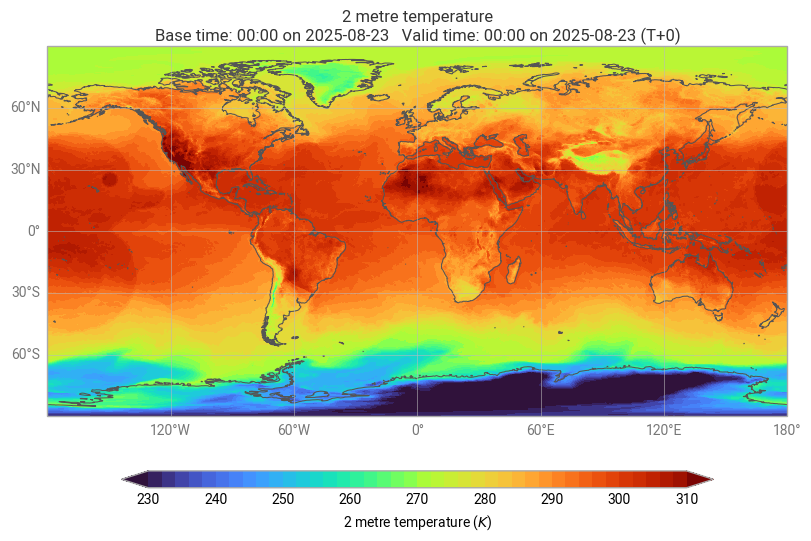

In [5]:
ek.plots.quickplot(ds.isel(step = 0).sel(param = '2t'))

ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


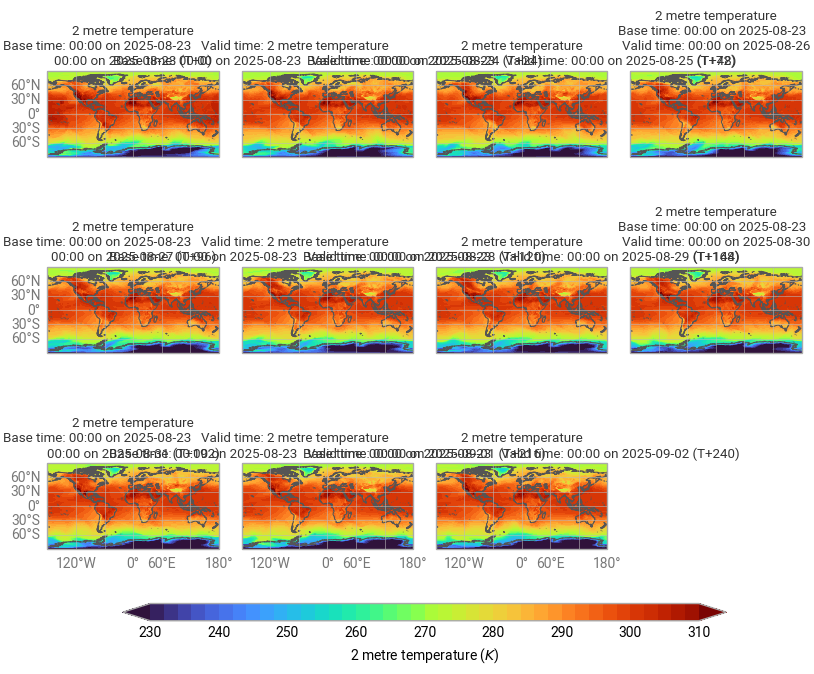

In [6]:
ek.plots.quickplot(ds.isel(step = slice(None, None, 4)).sel(param = '2t'))

## Regrid

If you want to explore the data on another grid, use `earthkit-regrid` to interpolate the data, currently only precomputed grids can be used.

In [8]:
ds_subset = ds.isel(step = 1).sel(param = '2t')

ds_r = ek.regrid.interpolate(ds_subset, out_grid = {'grid': [0.25,0.25]})
ds_r.head()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,20250823,0,6,fc,0,regular_ll


In [9]:
ds_r.to_xarray()

<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    2t         (latitude, longitude) float64 8MB ...
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        od
    stream:       oper
    levtype:      sfc
    type:         fc
    ...           ...
    date:         20250823
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF